In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
!pip install lifetimes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime, timedelta
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

In [98]:
ab = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/ab_assignment.csv')
campaigns = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/campaigns.csv')
chat_event = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/chat_events.csv')
log = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/event_logs.csv')
payment = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/payment_transactions.csv')
plan = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/plan_history.csv')
push_event = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/push_events.csv')
referral = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/referral_events.csv')
users = pd.read_csv('/content/drive/MyDrive/새싹캠퍼스/PJ4/Data/users.csv')

In [99]:
# users 자료구조 확인
users.head()
users.shape
users.dtypes

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaN,NaN,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaN,M,30s,35,cmp_001,facebook,spring24
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,2025-07-20 12:57:00,coejaeho@example.com,facebook_ads,monthly_pro,active,ios,2025-05-16,NaN,M,10s,16,cmp_003,google,sem24
3,usr_f0dbe9c02021,2025-01-25 11:14:00,2025-07-09 03:16:00,ngim@example.com,google_cpc,monthly_pro,active,android,2025-01-26 11:14:00,NaN,F,40s,48,cmp_001,facebook,spring24
4,usr_6f08473e5134,2025-01-30 02:22:00,2025-07-03 02:55:00,gimujin@example.com,direct,none,none,android,NaN,NaN,M,30s,31,cmp_001,facebook,spring24


(22545, 16)

,0
user_id,object
created_at,object
last_seen_at,object
email,object
acquisition_source,object
subscription_plan,object
plan_status,object
device_type,object
plan_start_date,object
plan_end_date,object


In [100]:
# 날짜형 변수 datetime형식으로 변환
date_cols = ['created_at', 'last_seen_at', 'plan_start_date', 'plan_end_date']

for col in date_cols:
    users[col] = pd.to_datetime(users[col], errors='coerce')

In [101]:
# users 결측치 확인
users.isnull().sum()

,0
user_id,0
created_at,0
last_seen_at,0
email,0
acquisition_source,0
subscription_plan,0
plan_status,0
device_type,0
plan_start_date,20587
plan_end_date,22240


In [102]:
# log 자료구조 확인
log.head()
log.shape
log.dtypes

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"


(717365, 7)

,0
user_id,object
session_id,object
event_name,object
event_timestamp,object
event_properties,object
device_type,object
location,object


In [103]:
log['event_timestamp'] = pd.to_datetime(log['event_timestamp'])

In [104]:
# log 결측치 확인
log.isnull().sum()

,0
user_id,0
session_id,0
event_name,0
event_timestamp,0
event_properties,0
device_type,0
location,0


In [105]:
# log 단계 확인
log['event_name'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


# [1] 퍼널 분석


## 1) 퍼널 단계 정의
1. signup_completed (회원가입 완료)
2. first_lesson_played (첫 강의 재생)
3. payment_completed (결제완료)

In [106]:
log.head()
log['event_name'].value_counts()

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"


,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


In [107]:
funnel_step = ['signup_completed','first_lesson_played','payment_completed']

In [108]:
funnel = log[log['event_name'].isin(funnel_step)]

In [109]:
funnel = funnel.groupby('event_name')['user_id'].nunique().reindex(funnel_step).reset_index()
funnel

,event_name,user_id
0,signup_completed,22545
1,first_lesson_played,20275
2,payment_completed,4962


In [110]:
funnel.rename({'event_name' : 'stage', 'user_id' : 'user_count'}, axis=1, inplace=True)
funnel

,stage,user_count
0,signup_completed,22545
1,first_lesson_played,20275
2,payment_completed,4962


## 2) 퍼널 시각화


In [111]:
import plotly.graph_objects as go

In [112]:
fig = go.Figure(go.Funnel(x=funnel['user_count'],
          y=funnel['stage'],
                    textposition='inside',
                    textinfo='value+percent initial+percent previous',

    opacity = 0.85,
    marker = {
        "color": ["#4E79A7", "#F28E2B", "#E15759"],
        "line": { "width": 1, "color": "#333333"}},
    connector = {"line": {"color": "gray",
                                        "dash": "dot",
                                        "width": 2}}));
fig

# [2] 코호트분석

In [113]:
log['event_name'].value_counts()
payment['status'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


,count
status,
success,5667


In [114]:
payment.head()

,payment_id,user_id,event_time,plan_name,amount,method,status
0,pay_d8b42511fe51,usr_182a54666833,2025-04-01 00:00:00,annual_basic,99.99,apple,success
1,pay_38bfe6505146,usr_48262cef2493,2025-04-01 00:00:00,monthly_basic,9.99,naver,success
2,pay_dfe9e467a1a5,usr_74ff4071a3e2,2025-04-01 00:00:00,annual_basic,99.99,naver,success
3,pay_55e6c5b83491,usr_385b38c519a3,2025-04-01 00:00:00,annual_basic,99.99,kakao,success
4,pay_592bc3d90809,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal,success


In [115]:
log_selected = log[['user_id', 'session_id', 'event_name', 'event_timestamp', 'event_properties', 'location']]

# users 전체 컬럼 + log_selected 머지
df = users.merge(log_selected, on='user_id', how='left')

In [116]:
df.shape
df.dtypes
df.head(2)

(717365, 21)

,0
user_id,object
created_at,datetime64[ns]
last_seen_at,datetime64[ns]
email,object
acquisition_source,object
subscription_plan,object
plan_status,object
device_type,object
plan_start_date,datetime64[ns]
plan_end_date,datetime64[ns]


,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,...,age_group,age,campaign_id,utm_source,utm_campaign,session_id,event_name,event_timestamp,event_properties,location
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaT,NaT,...,30s,39,cmp_003,google,sem24,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}","Seoul, South Korea"
1,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaT,NaT,...,30s,39,cmp_003,google,sem24,sess_2b7c28c6c89e,lesson_played,2025-04-03 10:47:00,"{""course_id"": ""L101"", ""lesson_id"": 19}","Seoul, South Korea"


In [117]:
df['signup_weekday'] = df['created_at'].dt.day_name()
df['signup_hour'] = df['created_at'].dt.hour

## 1) 가입요일 & 가입시간

In [118]:
first_lesson = df[df['event_name'] == 'first_lesson_played'][['user_id', 'signup_weekday', 'signup_hour']].drop_duplicates()
payment_completed = df[df['event_name'] == 'payment_completed'][['user_id']].drop_duplicates()

In [119]:
first_lesson['payment_completed'] = first_lesson['user_id'].isin(payment_completed['user_id']).astype(int)

In [120]:
first_lesson.head()

,user_id,signup_weekday,signup_hour,payment_completed
4,usr_6b87a57bd775,Sunday,12,0
75,usr_b95ee57a273a,Monday,20,0
170,usr_fc7ffc4130f7,Tuesday,2,1
311,usr_f0dbe9c02021,Saturday,11,0
396,usr_6f08473e5134,Thursday,2,0


In [121]:
cohort_result_weekday = first_lesson.groupby('signup_weekday')['payment_completed'].agg(['count', 'sum']).reset_index()
cohort_result_weekday.rename(columns={'count': 'first_lesson_users', 'sum': 'payment_completed'}, inplace=True)
cohort_result_weekday['conversion_rate(%)'] = (cohort_result_weekday['payment_completed'] / cohort_result_weekday['first_lesson_users'] * 100).round(2)

In [122]:
cohort_result_hour = first_lesson.groupby('signup_hour')['payment_completed'].agg(['count', 'sum']).reset_index()
cohort_result_hour.rename(columns={'count': 'first_lesson_users', 'sum': 'payment_completed'}, inplace=True)
cohort_result_hour['conversion_rate(%)'] = (cohort_result_hour['payment_completed'] / cohort_result_hour['first_lesson_users'] * 100).round(2)

In [123]:
wkhr_conv = (
    first_lesson
      .groupby(['signup_weekday','signup_hour'])['payment_completed']
      .agg(first_lesson_users='count', payment_completed='sum')
      .reset_index()
)
wkhr_conv['conversion_rate(%)'] = (wkhr_conv['payment_completed'] / wkhr_conv['first_lesson_users'] * 100).round(2)

In [124]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wkhr_conv['signup_weekday'] = pd.Categorical(wkhr_conv['signup_weekday'],
                                             categories=weekday_order, ordered=True)

In [125]:
all_hours = list(range(24))

In [126]:
# 전환율 피벗
pt_rate = (
    wkhr_conv.pivot(index='signup_weekday', columns='signup_hour', values='conversion_rate(%)')
             .reindex(index=weekday_order, columns=all_hours)
)

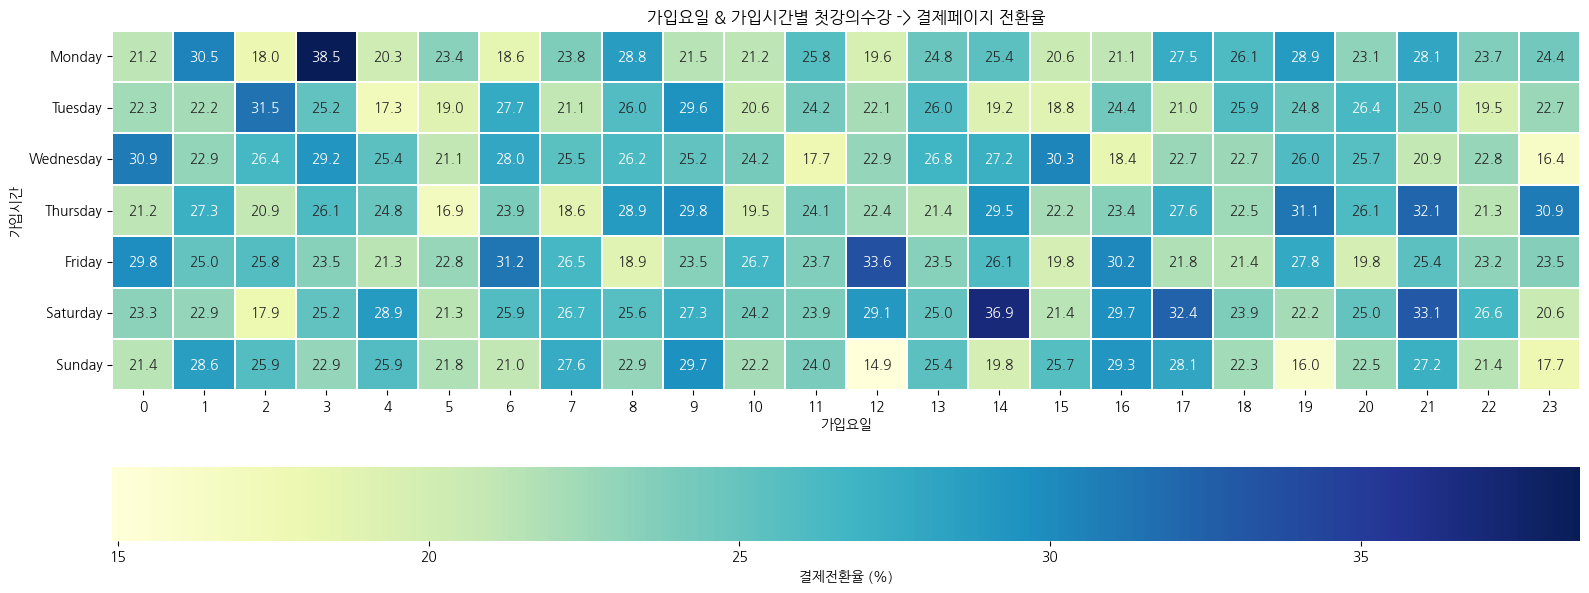

In [127]:
# 시각화
plt.figure(figsize=(16,6))
ax = sns.heatmap(pt_rate, annot=True, fmt='.1f', cmap='YlGnBu',
                 linewidths=.3, linecolor='white',
                 cbar_kws={'label':'결제전환율 (%)', 'orientation':'horizontal'})

ax.set_title('Payment Page Conversion by Signup Weekday × Hour', fontsize=14, weight='bold')
ax.set_xlabel('Signup Hour')
ax.set_ylabel('Signup Weekday')
plt.title('가입요일 & 가입시간별 첫강의수강 -> 결제페이지 전환율')
plt.xlabel('가입요일')
plt.ylabel('가입시간')
plt.tight_layout()
plt.show();

### 최대/최소 표시

In [128]:
from matplotlib import gridspec

In [129]:
pt_cnt = (
    wkhr_conv.pivot(index='signup_weekday', columns='signup_hour', values='first_lesson_users')
             .reindex(index=weekday_order, columns=all_hours))

In [130]:
row_conv = (pt_rate * pt_cnt).sum(axis=1) / pt_cnt.sum(axis=1)
col_conv = (pt_rate * pt_cnt).sum(axis=0) / pt_cnt.sum(axis=0)

row_conv = row_conv.rename('conversion_rate(%)')
col_conv = col_conv.rename('conversion_rate(%)')

plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.2], height_ratios=[4, 1], wspace=0.15, hspace=0.25)

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Axes: xlabel='signup_hour', ylabel='signup_weekday'>

Text(0.5, 1.0, '가입요일 × 가입시간별 결제페이지 전환율')

Text(0.5, 369.0911111111111, '가입 시간')

Text(196.72222222222223, 0.5, '가입 요일')

/tmp/ipython-input-851928958.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='signup_weekday'>

Text(0.5, 1.0, '요일별 전환율(가중평균)')

Text(0.5, 0, '%')

Text(0, 0.5, '')

/tmp/ipython-input-851928958.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='signup_hour'>

Text(0.5, 1.0, '시간대별 전환율(가중평균)')

Text(0, 0.5, '%')

Text(0.5, 0, '가입 시간')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

/tmp/ipython-input-851928958.py:33: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



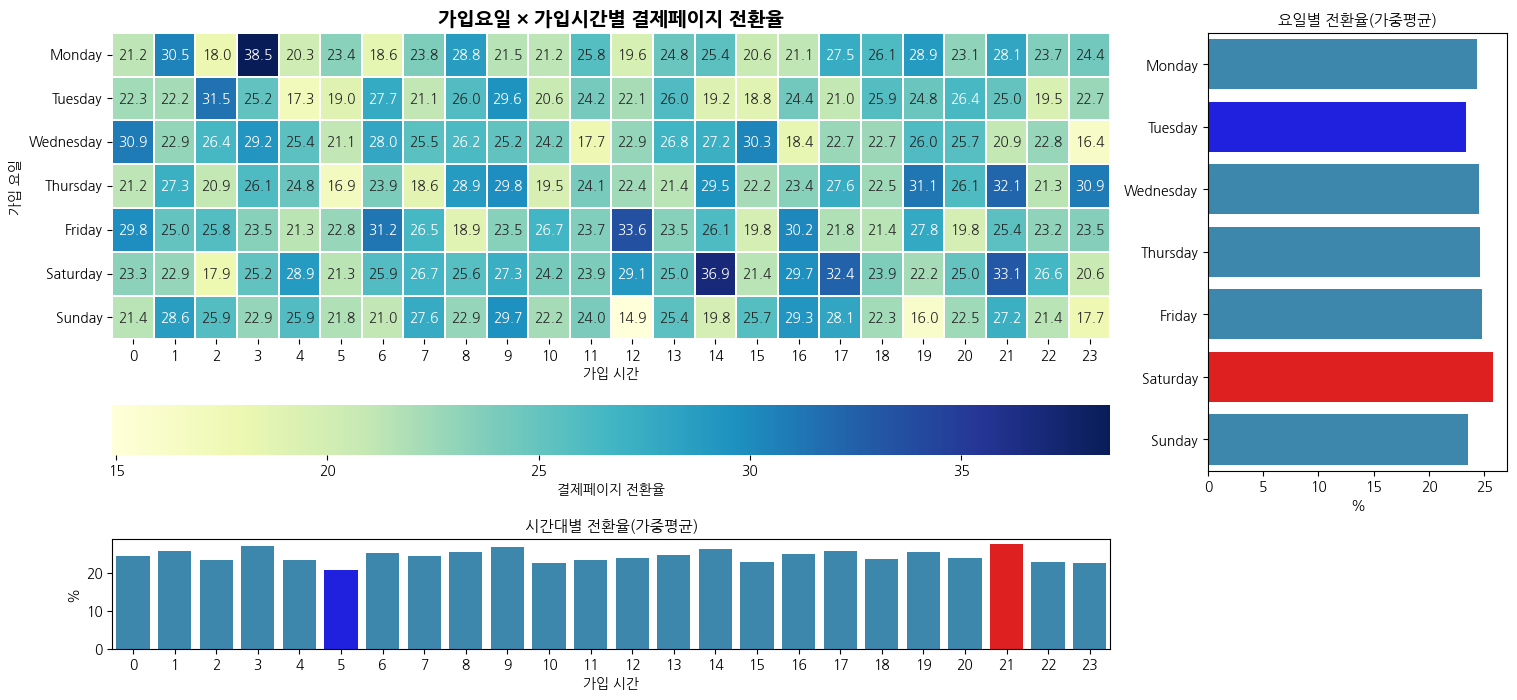

*요일별 전환율(가중평균) Top 3
signup_weekday
Saturday    25.78
Friday      24.82
Thursday    24.59
Name: conversion_rate(%), dtype: float64
*요일별 전환율(가중평균) Bottom 3
signup_weekday
Tuesday    23.36
Sunday     23.53
Monday     24.30
Name: conversion_rate(%), dtype: float64
*시간대별 전환율(가중평균) Top 3
signup_hour
21    27.44
3     27.04
9     26.74
Name: conversion_rate(%), dtype: float64
*시간대별 전환율(가중평균) Bottom 3
signup_hour
5     20.78
23    22.61
10    22.61
Name: conversion_rate(%), dtype: float64


In [131]:
# 시각화
row_colors = ['red' if i==row_conv.idxmax() else 'blue' if i==row_conv.idxmin() else '#2b8cbe'
              for i in row_conv.index]
col_colors = ['red' if i==col_conv.idxmax() else 'blue' if i==col_conv.idxmin() else '#2b8cbe'
              for i in col_conv.index]

plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.2], height_ratios=[4, 1],
                       wspace=0.15, hspace=0.25)

ax_hm = plt.subplot(gs[0,0])
sns.heatmap(pt_rate, annot=True, fmt='.1f', cmap='YlGnBu',
            linewidths=.3, linecolor='white',
            cbar_kws={'label': '결제페이지 전환율', 'orientation': 'horizontal'},
            ax=ax_hm)
ax_hm.set_title('가입요일 × 가입시간별 결제페이지 전환율', fontsize=14, weight='bold')
ax_hm.set_xlabel('가입 시간')
ax_hm.set_ylabel('가입 요일')

ax_row = plt.subplot(gs[0,1])
sns.barplot(y=row_conv.index, x=row_conv.values, orient='h', ax=ax_row, palette=row_colors)
ax_row.set_title('요일별 전환율(가중평균)', fontsize=11)
ax_row.set_xlabel('%'); ax_row.set_ylabel('')

ax_col = plt.subplot(gs[1,0])
sns.barplot(x=col_conv.index, y=col_conv.values, ax=ax_col, palette=col_colors)
ax_col.set_title('시간대별 전환율(가중평균)', fontsize=11)
ax_col.set_ylabel('%'); ax_col.set_xlabel('가입 시간')
ax_col.tick_params(axis='x', rotation=0)

ax_empty = plt.subplot(gs[1,1]); ax_empty.axis('off')

plt.tight_layout()
plt.show()

print('*요일별 전환율(가중평균) Top 3')
print(row_conv.sort_values(ascending=False).head(3).round(2))
print('*요일별 전환율(가중평균) Bottom 3')
print(row_conv.sort_values().head(3).round(2))
print('*시간대별 전환율(가중평균) Top 3')
print(col_conv.sort_values(ascending=False).head(3).round(2))
print('*시간대별 전환율(가중평균) Bottom 3')
print(col_conv.sort_values().head(3).round(2))

## 2) 디바이스 & 유입채널별


In [132]:
df_users = df[['user_id','device_type','acquisition_source']].drop_duplicates()

In [133]:
first_lesson_ts = (
    log[log['event_name']=='first_lesson_played']
      .groupby('user_id', as_index=False)['event_timestamp'].min()
      .rename(columns={'event_timestamp':'first_lesson_at'})
)
payment_ts = (
    log[log['event_name']=='payment_completed']
      .groupby('user_id', as_index=False)['event_timestamp'].min()
      .rename(columns={'event_timestamp':'paid_at'})
)

In [134]:
base = (df_users
        .merge(first_lesson_ts, on='user_id', how='left')
        .merge(payment_ts,      on='user_id', how='left'))
base['has_first'] = base['first_lesson_at'].notna()
base['paid_after_first'] = base['has_first'] & base['paid_at'].notna() & (base['paid_at'] >= base['first_lesson_at'])

In [135]:
g = (base[base['has_first']]
     .groupby(['device_type','acquisition_source'])
     .agg(total_users=('user_id','nunique'),
          paid_users=('paid_after_first','sum'))
     .reset_index())

In [136]:
pt_total = g.pivot(index='device_type', columns='acquisition_source', values='total_users').fillna(0)
pt_paid  = g.pivot(index='device_type', columns='acquisition_source', values='paid_users').fillna(0)
pt_rate  = (pt_paid / pt_total.replace(0, np.nan) * 100).round(1)

In [137]:
row_conv = (pt_paid.sum(axis=1) / pt_total.sum(axis=1) * 100).replace([np.inf, -np.inf], np.nan).fillna(0).round(1)  # 디바이스별
col_conv = (pt_paid.sum(axis=0) / pt_total.sum(axis=0) * 100).replace([np.inf, -np.inf], np.nan).fillna(0).round(1)  # 유입채널별

In [138]:
row_colors = ['red' if i==row_conv.idxmax() else 'blue' if i==row_conv.idxmin() else '#2b8cbe'
              for i in row_conv.index]
col_colors = ['red' if i==col_conv.idxmax() else 'blue' if i==col_conv.idxmin() else '#2b8cbe'
              for i in col_conv.index]

<Figure size 1800x800 with 0 Axes>

<Axes: xlabel='acquisition_source', ylabel='device_type'>

Text(0.5, 1.0, '디바이스 × 유입채널 결제전환율 (첫강의→결제)')

Text(0.5, 369.0911111111111, '유입채널')

Text(196.72222222222223, 0.5, '디바이스')

/tmp/ipython-input-2519014366.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: ylabel='device_type'>

Text(0.5, 1.0, '디바이스별 전환율(가중평균)')

Text(0.5, 0, '%')

Text(0, 0.5, '')

/tmp/ipython-input-2519014366.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='acquisition_source'>

Text(0.5, 1.0, '유입채널별 전환율(가중평균)')

Text(0, 0.5, '%')

Text(0.5, 0, '유입채널')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

/tmp/ipython-input-2519014366.py:28: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



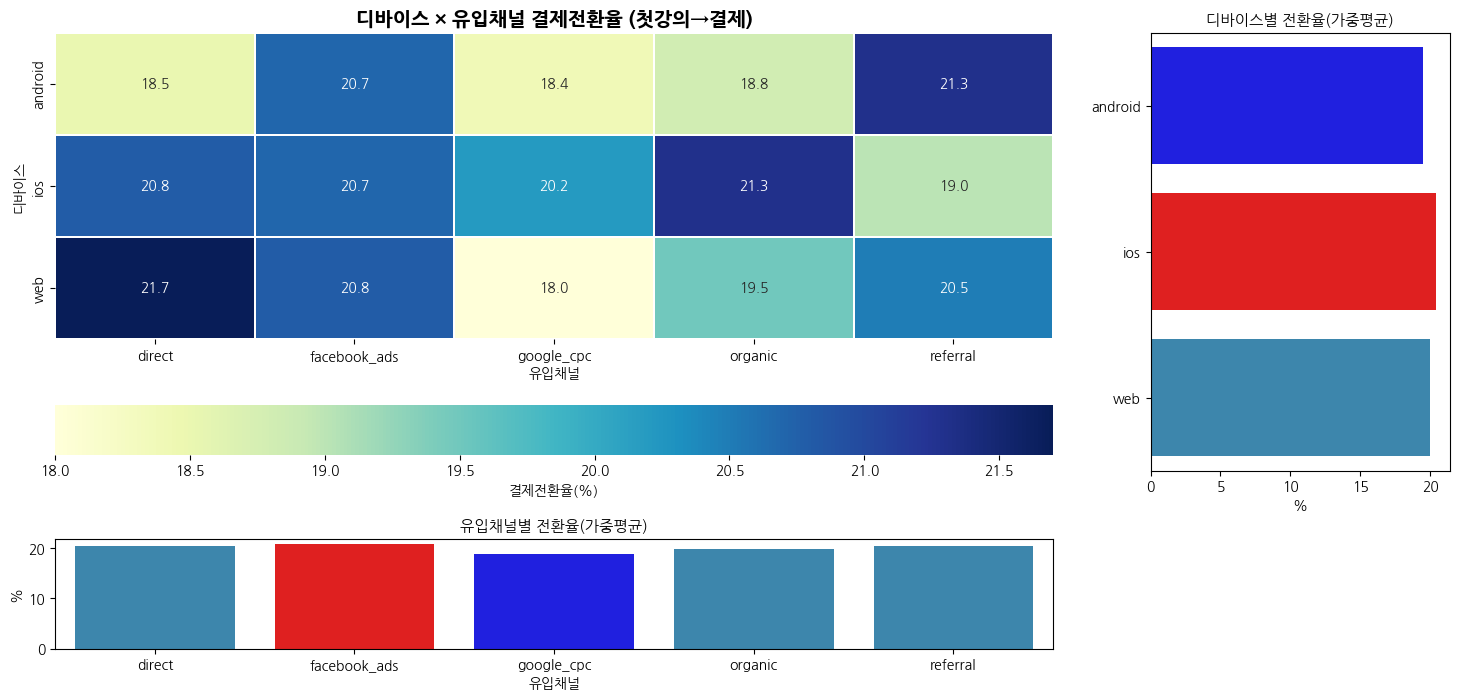

🔹 디바이스별 전환율 Top 3
device_type
ios        20.4
web        20.0
android    19.5
dtype: float64

🔹 디바이스별 전환율 Bottom 3
device_type
android    19.5
web        20.0
ios        20.4
dtype: float64

🔹 유입채널별 전환율 Top 3
acquisition_source
facebook_ads    20.7
direct          20.4
referral        20.3
dtype: float64

🔹 유입채널별 전환율 Bottom 3
acquisition_source
google_cpc    18.8
organic       19.8
referral      20.3
dtype: float64


In [139]:
# 시각화
plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.2], height_ratios=[4, 1],
                       wspace=0.15, hspace=0.25)

ax_hm = plt.subplot(gs[0,0])
sns.heatmap(pt_rate, annot=True, fmt='.1f', cmap='YlGnBu',
            linewidths=.3, linecolor='white',
            cbar_kws={'label': '결제전환율(%)', 'orientation': 'horizontal'},
            ax=ax_hm)
ax_hm.set_title('디바이스 × 유입채널 결제전환율 (첫강의→결제)', fontsize=14, weight='bold')
ax_hm.set_xlabel('유입채널')
ax_hm.set_ylabel('디바이스')

ax_row = plt.subplot(gs[0,1])
sns.barplot(y=row_conv.index, x=row_conv.values, orient='h', ax=ax_row, palette=row_colors)
ax_row.set_title('디바이스별 전환율(가중평균)', fontsize=11)
ax_row.set_xlabel('%'); ax_row.set_ylabel('')

ax_col = plt.subplot(gs[1,0])
sns.barplot(x=col_conv.index, y=col_conv.values, ax=ax_col, palette=col_colors)
ax_col.set_title('유입채널별 전환율(가중평균)', fontsize=11)
ax_col.set_ylabel('%'); ax_col.set_xlabel('유입채널')
ax_col.tick_params(axis='x', rotation=0)

ax_empty = plt.subplot(gs[1,1]); ax_empty.axis('off')

plt.tight_layout()
plt.show()

print('*디바이스별 전환율 Top 3')
print(row_conv.sort_values(ascending=False).head(3))
print('*디바이스별 전환율 Bottom 3')
print(row_conv.sort_values().head(3))
print('*유입채널별 전환율 Top 3')
print(col_conv.sort_values(ascending=False).head(3))
print('*유입채널별 전환율 Bottom 3')
print(col_conv.sort_values().head(3))

### (1) 유입채널별


In [140]:
df['acquisition_source']

,acquisition_source
0,referral
1,referral
2,referral
3,referral
4,referral
...,...
717360,direct
717361,direct
717362,direct
717363,direct


In [141]:
base.head()

,user_id,device_type,acquisition_source,first_lesson_at,paid_at,has_first,paid_after_first
0,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False
1,usr_b95ee57a273a,android,referral,2025-04-14 10:38:00,NaT,True,False
2,usr_fc7ffc4130f7,ios,facebook_ads,2025-05-04 03:07:00,2025-05-16 06:24:18,True,True
3,usr_f0dbe9c02021,android,google_cpc,2025-04-09 08:16:00,NaT,True,False
4,usr_6f08473e5134,android,direct,2025-04-05 19:23:00,NaT,True,False


In [142]:
df_channels = df['user_id'].drop_duplicates()

base_ch = base.merge(df_channels, on='user_id', how='left')

# 1) 유입채널별 전환율 집계 (분모: 첫강의 경험 유저)
channel_conv = (
    base_ch[base_ch['has_first']]
    .groupby('acquisition_source', dropna=False)  # NaN 채널도 보려면 dropna=False
    .agg(
        total_users=('user_id', 'nunique'),
        paid_users =('paid_after_first', 'sum')
    )
    .reset_index()
)

channel_conv['conversion_rate(%)'] = (
    channel_conv['paid_users'] / channel_conv['total_users'] * 100
).replace([np.inf, -np.inf], np.nan).fillna(0).round(1)

# 보기 좋게 정렬
channel_conv = channel_conv.sort_values('conversion_rate(%)', ascending=False)

print(channel_conv)

  acquisition_source  total_users  paid_users  conversion_rate(%)
1       facebook_ads         3972         823                20.7
0             direct         3930         800                20.4
4           referral         4033         817                20.3
3            organic         4185         830                19.8
2         google_cpc         4155         783                18.8


<Figure size 900x500 with 0 Axes>

/tmp/ipython-input-7145403.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='acquisition_source', ylabel='conversion_rate(%)'>

Text(0.5, 1.0, '유입채널별 결제 전환율 (첫강의→결제)')

Text(0, 0.5, '결제전환율 (%)')

Text(0.5, 0, '유입채널')

(10.0, 21.5)

Text(0, 21.0, '20.7%')

Text(1, 20.7, '20.4%')

Text(2, 20.6, '20.3%')

Text(3, 20.1, '19.8%')

Text(4, 19.1, '18.8%')

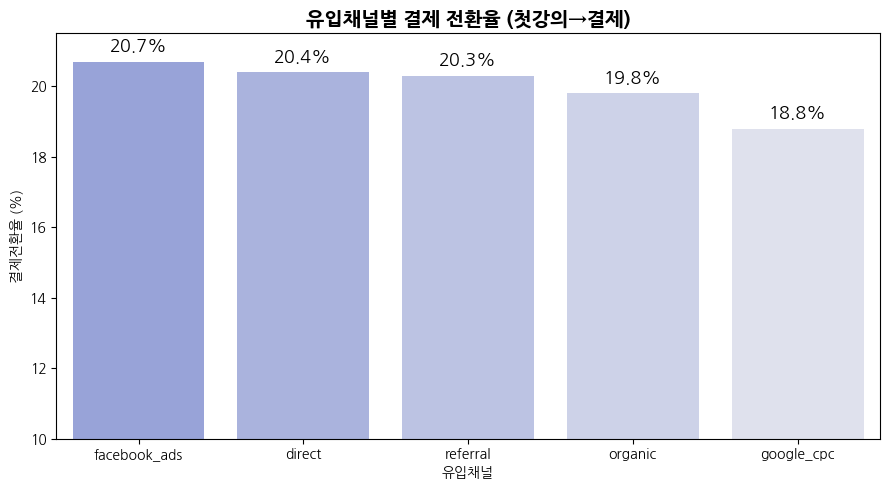

In [143]:
PRIMARY = "#7A8CE0"

# 채널 순서를 유지한 상태에서, '너무 밝은/어두운' 색은 제외
n = len(channel_conv)
brand_palette_full = sns.light_palette(PRIMARY, n_colors=n+2, reverse=True)  # 여유색 2개 추가
brand_palette = brand_palette_full[1:-1]  # 양끝 제거 → 가장 낮은 막대도 'organic' 정도의 톤 유지

plt.figure(figsize=(9,5))
sns.barplot(
    data=channel_conv,
    x='acquisition_source',
    y='conversion_rate(%)',
    palette=brand_palette,
    order=channel_conv['acquisition_source']
)

plt.title('유입채널별 결제 전환율 (첫강의→결제)', fontsize=14, weight='bold')
plt.ylabel('결제전환율 (%)'); plt.xlabel('유입채널')
plt.ylim(10, 21.5)
for x, v in enumerate(channel_conv['conversion_rate(%)'].values):
    plt.text(x, v + 0.3, f'{v:.1f}%', ha='center', fontsize=13)

plt.tight_layout()
plt.show()

### (2) 디바이스별

In [144]:
# 디바이스별 결제 전환율 계산 (base 기준)
base = base.merge(df[['user_id']], on='user_id', how='left')

In [145]:
base.head()

,user_id,device_type,acquisition_source,first_lesson_at,paid_at,has_first,paid_after_first
0,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False
1,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False
2,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False
3,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False
4,usr_6b87a57bd775,web,referral,2025-04-03 10:48:09,NaT,True,False


In [146]:
device_conv = (
    base[base['has_first']]
    .groupby('device_type')
    .agg(
        total_users=('user_id', 'nunique'),
        paid_users=('user_id', lambda x: base.loc[base['user_id'].isin(x) & base['paid_after_first'], 'user_id'].nunique())
    )
    .reset_index()
)

device_conv['conversion_rate(%)'] = (
    device_conv['paid_users'] / device_conv['total_users'] * 100
).round(1)

In [147]:
device_conv.head()

,device_type,total_users,paid_users,conversion_rate(%)
0,android,6670,1302,19.5
1,ios,6749,1377,20.4
2,web,6856,1374,20.0


<Figure size 900x500 with 0 Axes>

<Axes: xlabel='device_type', ylabel='conversion_rate(%)'>

Text(0.5, 1.0, '디바이스별 결제 전환율 (첫강의→결제)')

Text(0, 0.5, '결제전환율 (%)')

Text(0.5, 0, '디바이스')

(10.0, 21.5)

Text(0, 20.7, '20.4%')

Text(1, 20.3, '20.0%')

Text(2, 19.8, '19.5%')

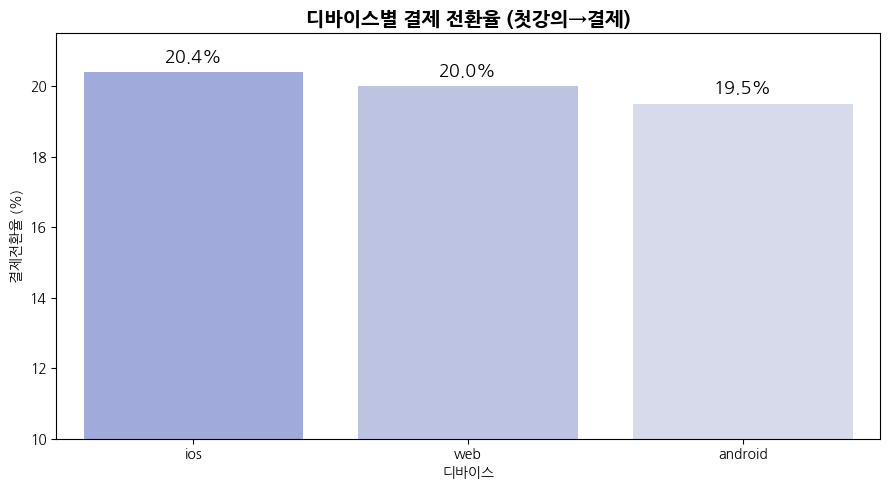

In [148]:
PRIMARY = "#7A8CE0"

# 전환율 내림차순 정렬
device_conv = device_conv.sort_values('conversion_rate(%)', ascending=False)
order = device_conv['device_type']

# PRIMARY 컬러 기반 그라데이션 (양끝 색 제외)
n = len(device_conv)
brand_palette_full = sns.light_palette(PRIMARY, n_colors=n+2, reverse=True)
brand_palette = brand_palette_full[1:-1]

plt.figure(figsize=(9,5))
sns.barplot(
    data=device_conv,
    x='device_type',
    y='conversion_rate(%)',
    hue='device_type',        # <- hue 추가
    dodge=False, legend=False, # <- 범례 제거
    palette=brand_palette,
    order=order
)

plt.title('디바이스별 결제 전환율 (첫강의→결제)', fontsize=14, weight='bold')
plt.ylabel('결제전환율 (%)')
plt.xlabel('디바이스')
plt.ylim(10, 21.5)

for i, v in enumerate(device_conv['conversion_rate(%)'].values):
    plt.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=13)

plt.tight_layout()
plt.show()

## 3) 성별 x 연령별
-> 60대 이상 = 60s

In [149]:
users['age_group'].value_counts()

,count
age_group,
20s,3891
40s,3804
10s,3736
60s,3725
50s,3713
30s,3676


In [150]:
users.loc[users['age'] > 60, 'age_group'].value_counts()

,count
age_group,
60s,3660


In [151]:
users[(users['age'] >= 60) & (users['age'] < 70)].shape[0]

616

In [152]:
users.head(2)

,user_id,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_6b87a57bd775,2025-02-09 12:50:00,2025-07-09 00:05:00,jinhyeonu@example.net,referral,none,none,web,NaT,NaT,M,30s,39,cmp_003,google,sem24
1,usr_b95ee57a273a,2024-12-09 20:57:00,2025-07-19 09:29:00,wgim@example.com,referral,annual_pro,active,android,2024-12-16 20:57:00,NaT,M,30s,35,cmp_001,facebook,spring24


In [153]:
users['age'].isnull().sum()

np.int64(0)

In [154]:
df_users = df[['user_id', 'gender', 'age_group']].drop_duplicates()

In [155]:
first_lesson_ts = (
    log[log['event_name'] == 'first_lesson_played']
    .groupby('user_id', as_index=False)['event_timestamp'].min()
    .rename(columns={'event_timestamp': 'first_lesson_at'})
)

payment_ts = (
    log[log['event_name'] == 'payment_completed']
    .groupby('user_id', as_index=False)['event_timestamp'].min()
    .rename(columns={'event_timestamp': 'paid_at'})
)

In [156]:
base = (df_users
        .merge(first_lesson_ts, on='user_id', how='left')
        .merge(payment_ts, on='user_id', how='left'))

base['has_first'] = base['first_lesson_at'].notna()
base['paid_after_first'] = (
    base['has_first'] &
    base['paid_at'].notna() &
    (base['paid_at'] >= base['first_lesson_at'])
)

In [157]:
g = (base[base['has_first']]
     .groupby(['gender', 'age_group'])
     .agg(total_users=('user_id', 'nunique'),
          paid_users=('paid_after_first', 'sum'))
     .reset_index())

pt_total = g.pivot(index='gender', columns='age_group', values='total_users').fillna(0)
pt_paid = g.pivot(index='gender', columns='age_group', values='paid_users').fillna(0)
pt_rate = (pt_paid / pt_total.replace(0, np.nan) * 100).round(1)

In [158]:
pt_rate = pt_rate.rename(columns=lambda x: "60+" if x == "60s" else x)

In [159]:
row_conv = (pt_paid.sum(axis=1) / pt_total.sum(axis=1) * 100).fillna(0).round(1)
col_conv = (pt_paid.sum(axis=0) / pt_total.sum(axis=0) * 100).fillna(0).round(1)


/tmp/ipython-input-1485829652.py:78: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



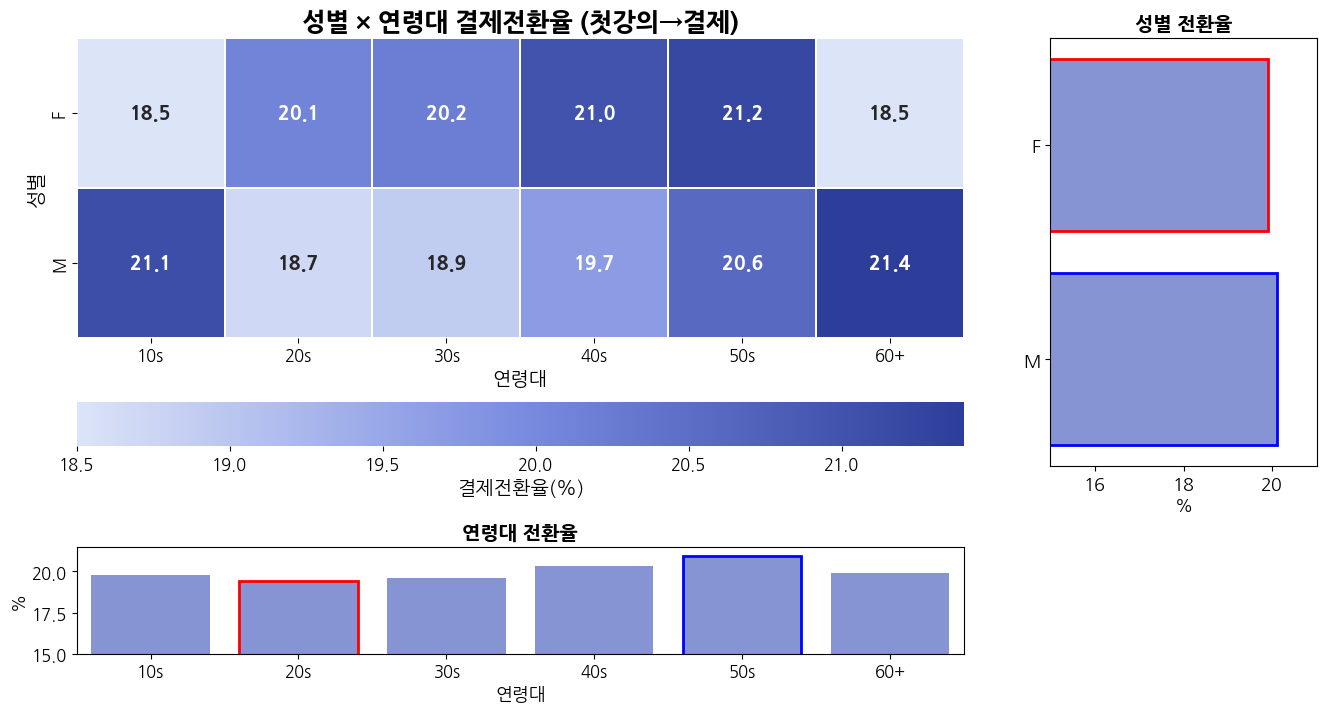

In [160]:
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap

PRIMARY = "#7A8CE0"

# 가티 팔레트 (연한 하늘 → 메인 → 진한 남색)
gati_cmap = LinearSegmentedColormap.from_list(
    "gati_strong", ["#DCE4F7", PRIMARY, "#2C3E99"], N=256
)

plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4, 1.2], height_ratios=[4, 1],
                       wspace=0.15, hspace=0.30)

col_conv.index = col_conv.index.map(lambda x: "60+" if x == "60s" else x)

# (A) Heatmap — 폰트 크기 키움
ax_hm = plt.subplot(gs[0, 0])
sns.heatmap(
    pt_rate, annot=True, fmt='.1f', cmap=gati_cmap,
    annot_kws={"size": 14, "weight": "bold"},  # 히트맵 값 폰트 크기
    linewidths=.3, linecolor='white',
    cbar_kws={'label': '결제전환율(%)', 'orientation': 'horizontal'},
    ax=ax_hm
)
ax_hm.set_title('성별 × 연령대 결제전환율 (첫강의→결제)', fontsize=18, weight='bold')
ax_hm.set_xlabel('연령대', fontsize=14); ax_hm.set_ylabel('성별', fontsize=14)
ax_hm.tick_params(axis='x', labelsize=12)
ax_hm.tick_params(axis='y', labelsize=12)
# 컬러바 폰트 크기
cbar = ax_hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_xlabel('결제전환율(%)', fontsize=14)


# (B) 성별 전환율 막대 — 폰트 크기 키움
ax_row = plt.subplot(gs[0, 1])
sns.barplot(y=row_conv.index, x=row_conv.values, orient='h',
            color=PRIMARY, ax=ax_row)
ax_row.set_title('성별 전환율', fontsize=14, weight='bold')
ax_row.set_xlabel('%', fontsize=12); ax_row.set_ylabel('')
ax_row.tick_params(axis='x', labelsize=13)
ax_row.tick_params(axis='y', labelsize=13)

# x축 범위 10~20%로 고정
ax_row.set_xlim(15, 21)

for bar, label in zip(ax_row.patches, row_conv.index):
    if label == 'M':
        bar.set_edgecolor('blue');  bar.set_linewidth(2)
    elif label == 'F':
        bar.set_edgecolor('red'); bar.set_linewidth(2)
    else:
        bar.set_edgecolor('none')

# (C) 연령대 전환율 막대 — 폰트 크기 키움
ax_col = plt.subplot(gs[1, 0])
sns.barplot(x=col_conv.index, y=col_conv.values, color=PRIMARY, ax=ax_col)
ax_col.set_title('연령대 전환율', fontsize=14, weight='bold')
ax_col.set_ylabel('%', fontsize=12); ax_col.set_xlabel('연령대', fontsize=13)
ax_col.tick_params(axis='x', labelsize=12)
ax_col.tick_params(axis='y', labelsize=12)

# y축 범위 10~20%로 고정
ax_col.set_ylim(15, 21.5)

for bar, label in zip(ax_col.patches, col_conv.index):
    if label == '50s':
        bar.set_edgecolor('blue');  bar.set_linewidth(2)
    elif label == '20s':
        bar.set_edgecolor('red'); bar.set_linewidth(2)
    else:
        bar.set_edgecolor('none')

# (D) 빈칸
ax_empty = plt.subplot(gs[1, 1]); ax_empty.axis('off')

plt.tight_layout()
plt.show();

## 4) 마케팅 캠페인 x 채널별

In [161]:
df['utm_source'].value_counts()
df['utm_campaign'].value_counts()

,count
utm_source,
google,243289
facebook,237287
referral,236789


,count
utm_campaign,
sem24,243289
spring24,237287
ref_buddy,236789


In [162]:
df.groupby(['utm_source', 'utm_campaign']).size().reset_index(name='count').sort_values('count', ascending=False)

,utm_source,utm_campaign,count
1,google,sem24,243289
0,facebook,spring24,237287
2,referral,ref_buddy,236789


In [163]:
df_users = df[['user_id','utm_source','utm_campaign']].drop_duplicates()

base = (df_users
        .merge(first_lesson_ts, on='user_id', how='left')
        .merge(payment_ts,      on='user_id', how='left'))
base['has_first'] = base['first_lesson_at'].notna()
base['paid_after_first'] = base['has_first'] & base['paid_at'].notna() & (base['paid_at'] >= base['first_lesson_at'])

g = (base[base['has_first']]
     .groupby(['utm_source','utm_campaign'])
     .agg(total_users=('user_id','nunique'),
          paid_users=('paid_after_first','sum'))
     .reset_index())

pt_total = g.pivot(index='utm_source', columns='utm_campaign', values='total_users').fillna(0)
pt_paid  = g.pivot(index='utm_source', columns='utm_campaign', values='paid_users').fillna(0)
pt_rate  = (pt_paid / pt_total.replace(0, np.nan) * 100).round(1)

row_conv = (pt_paid.sum(axis=1) / pt_total.sum(axis=1) * 100).round(1)
col_conv = (pt_paid.sum(axis=0) / pt_total.sum(axis=0) * 100).round(1)

row_colors = ['red' if i==row_conv.idxmax() else 'blue' if i==row_conv.idxmin() else '#2b8cbe'
              for i in row_conv.index]
col_colors = ['red' if i==col_conv.idxmax() else 'blue' if i==col_conv.idxmin() else '#2b8cbe'
              for i in col_conv.index]

/tmp/ipython-input-2955883234.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2955883234.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2955883234.py:26: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



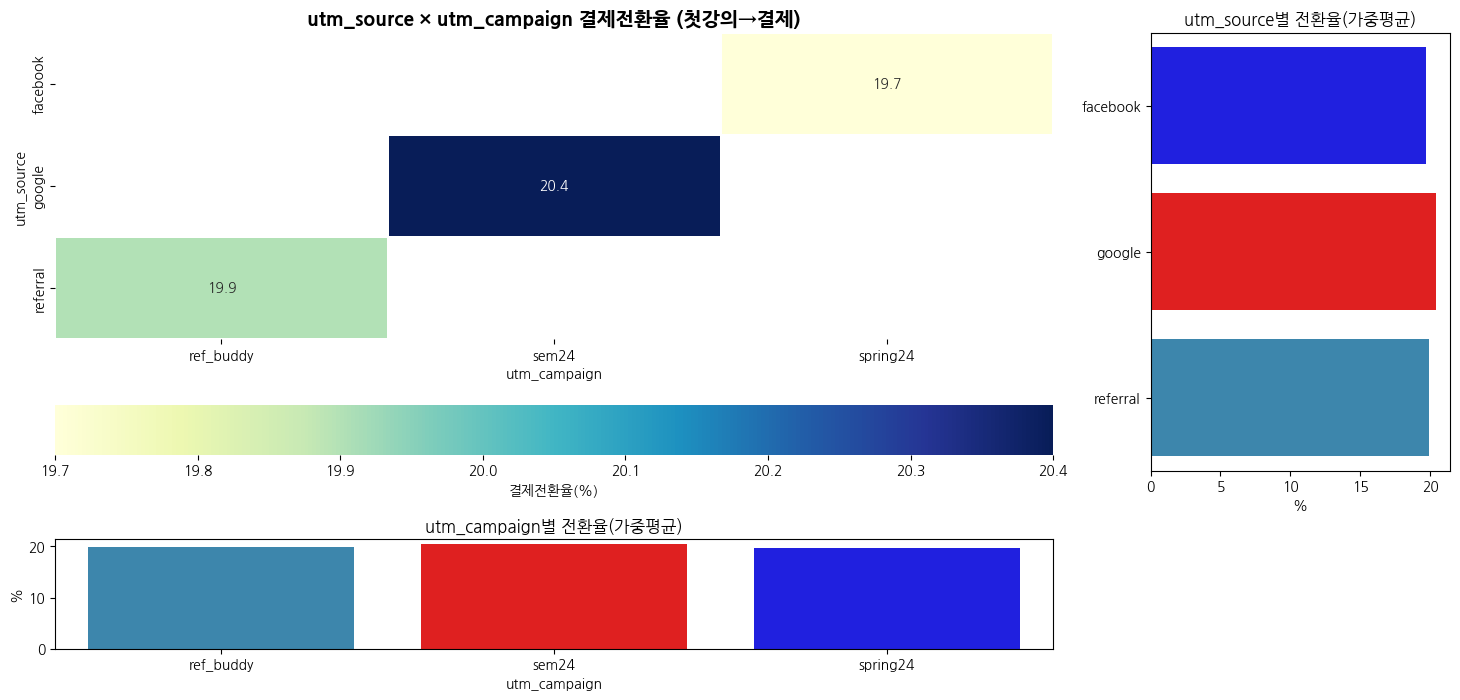

In [164]:
# 시각화
plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1.2], height_ratios=[4, 1], wspace=0.15, hspace=0.25)

ax_hm = plt.subplot(gs[0,0])
sns.heatmap(pt_rate, annot=True, fmt='.1f', cmap='YlGnBu',
            linewidths=.3, linecolor='white',
            cbar_kws={'label': '결제전환율(%)', 'orientation': 'horizontal'},
            ax=ax_hm)
ax_hm.set_title('utm_source × utm_campaign 결제전환율 (첫강의→결제)', fontsize=14, weight='bold')
ax_hm.set_xlabel('utm_campaign')
ax_hm.set_ylabel('utm_source')

ax_row = plt.subplot(gs[0,1])
sns.barplot(y=row_conv.index, x=row_conv.values, orient='h', ax=ax_row, palette=row_colors)
ax_row.set_title('utm_source별 전환율(가중평균)')
ax_row.set_xlabel('%'); ax_row.set_ylabel('')

ax_col = plt.subplot(gs[1,0])
sns.barplot(x=col_conv.index, y=col_conv.values, ax=ax_col, palette=col_colors)
ax_col.set_title('utm_campaign별 전환율(가중평균)')
ax_col.set_ylabel('%'); ax_col.set_xlabel('utm_campaign')

ax_empty = plt.subplot(gs[1,1]); ax_empty.axis('off')

plt.tight_layout()
plt.show();

## 5) 첫강의수강 -> 결제일 소요일수 히트맵

In [165]:
df = log.copy()
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"])

In [166]:
lesson_df = df[df["event_name"] == "lesson_played"].copy()
lesson_df = lesson_df.sort_values(["user_id", "event_timestamp"])
lesson_df["rank"] = lesson_df.groupby("user_id")["event_timestamp"].rank(method="first")

In [167]:
first_lesson = lesson_df[lesson_df["rank"] == 1][["user_id", "event_timestamp"]].rename(columns={"event_timestamp": "t1"})
first_lesson["cohort_week"] = first_lesson["t1"].dt.to_period("W-SUN").dt.start_time.dt.strftime("%Y-%m-%d")

In [168]:
payment_df = df[df["event_name"] == "payment_completed"].copy()
payment_df = payment_df.sort_values(["user_id", "event_timestamp"])
payment_df_first = payment_df.groupby("user_id").first().reset_index().rename(columns={"event_timestamp": "t_payment"})

In [169]:
pair_pay = first_lesson.merge(payment_df_first, on="user_id", how="left")
pair_pay["days_diff"] = (pair_pay["t_payment"] - pair_pay["t1"]).dt.days
pair_pay["paid"] = pair_pay["days_diff"].notna().astype(int)

In [170]:
bins   = [-np.inf, 0, 1, 2, 3, 4, 5, 6, 7, 14, 21, 28, np.inf]
labels = ["0일","1일","2일","3일","4일","5일","6일","7일",
          "8~14일","15~21일","22~28일","28일+"]

In [171]:
pair_pay["days_bucket"] = pd.cut(pair_pay["days_diff"], bins=bins, labels=labels, right=True)

In [172]:
cohort_size = pair_pay.groupby("cohort_week")["user_id"].nunique().reset_index(name="cohort_size")
paid_users  = pair_pay.groupby(["cohort_week","days_bucket"])["paid"].sum().reset_index(name="paid_users")

/tmp/ipython-input-1035214878.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [173]:
cohort_data = paid_users.merge(cohort_size, on="cohort_week", how="left")
cohort_data["conversion_rate"] = (cohort_data["paid_users"] / cohort_data["cohort_size"]).round(3)

In [174]:
conversion_matrix = (
    cohort_data
      .pivot(index="cohort_week", columns="days_bucket", values="conversion_rate")
      .reindex(columns=labels)
      .fillna(0))

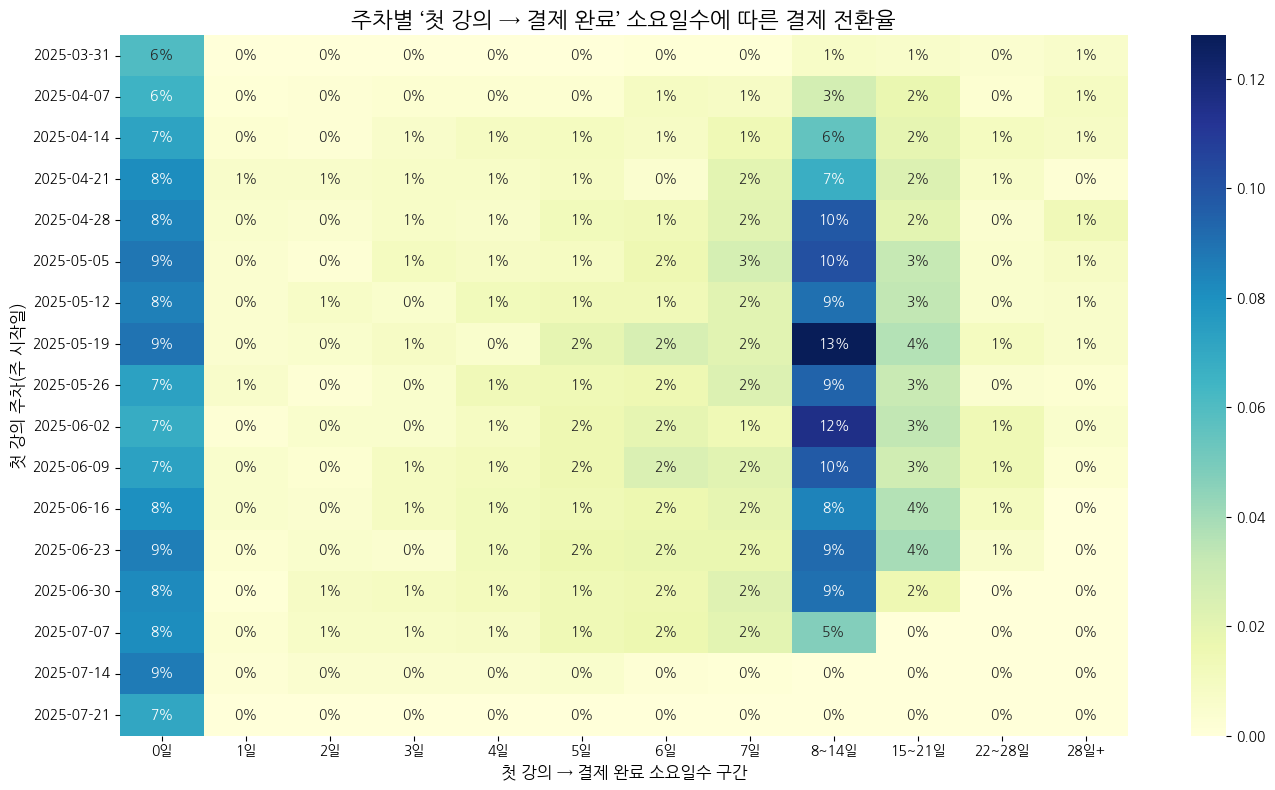

In [175]:
# 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(conversion_matrix, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("주차별 ‘첫 강의 → 결제 완료’ 소요일수에 따른 결제 전환율", fontsize=16)
plt.ylabel("첫 강의 주차(주 시작일)", fontsize=12)
plt.xlabel("첫 강의 → 결제 완료 소요일수 구간", fontsize=12)
plt.tight_layout()
plt.show();

### 첫 강의 -> 결제완료 소요일수 시각화 (7일이후 세분화)

In [176]:
bins   = [-np.inf, 0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 20, np.inf]
labels = ["0일","1일","2일","3일","4일","5일","6일",
          "7~8일","9~10일","11~12일","13~14일","15~20일","30일+"]

pair_pay["days_bucket"] = pd.cut(pair_pay["days_diff"], bins=bins, labels=labels, right=True)

In [177]:
cohort_size = pair_pay.groupby("cohort_week")["user_id"].nunique().reset_index(name="cohort_size")
paid_users  = pair_pay.groupby(["cohort_week","days_bucket"])["paid"].sum().reset_index(name="paid_users")

cohort = paid_users.merge(cohort_size, on="cohort_week", how="left")
cohort["conversion_rate"] = (cohort["paid_users"] / cohort["cohort_size"]).round(3)

/tmp/ipython-input-2807863211.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [178]:
mat = (cohort
       .pivot(index="cohort_week", columns="days_bucket", values="conversion_rate")
       .reindex(columns=labels)   # x축 순서 고정
       .fillna(0))

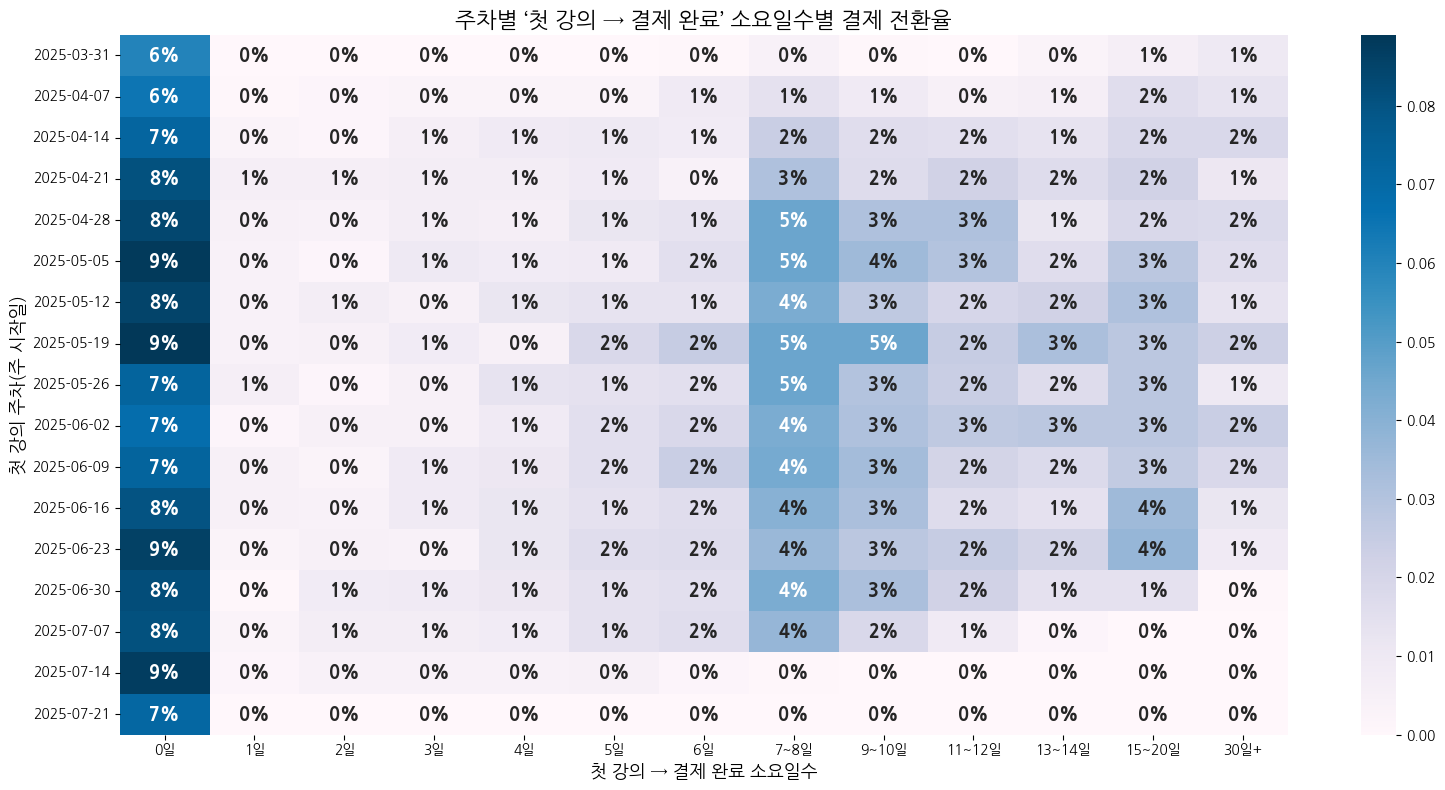

In [179]:
# 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(mat, annot=True, fmt=".0%", cmap="PuBu", annot_kws={"size": 13, "weight": "bold"})
plt.title("주차별 ‘첫 강의 → 결제 완료’ 소요일수별 결제 전환율", fontsize=16)
plt.ylabel("첫 강의 주차(주 시작일)", fontsize=13)
plt.xlabel("첫 강의 → 결제 완료 소요일수", fontsize=13)
plt.tight_layout()
plt.show();

# [3] 추가분석

## 1) DAU, WAU, MAU, Stickiness

In [200]:
# ===== GATI Brand Palette =====
GATI = {
    "primary": "#7180CB",      # 1번 컬러
    "surface": "#FFFFFF",      # 2번 컬러
    "primary_dark": "#5F6FC5",
    "accent1": "#9DA8E6",
    "grid": "#C9CDE6",
    "text_dark": "#3D4661",
}

plt.rcParams.update({
    "axes.facecolor": GATI["surface"],
    "figure.facecolor": "#FFFFFF",
    "axes.edgecolor": GATI["grid"],
    "axes.labelcolor": GATI["text_dark"],
    "xtick.color": GATI["text_dark"],
    "ytick.color": GATI["text_dark"],
    "grid.color": GATI["grid"],
    "grid.linestyle": "-",
    "grid.alpha": 0.7,
    "legend.frameon": False,
})

try:
    log
    df = log.copy()
except NameError:
    df = pd.read_csv("event_logs.csv")

# 1) 핵심행동 필터링
df_core = df[df["event_name"] == "lesson_played"].copy()
df_core["event_timestamp"] = pd.to_datetime(df_core["event_timestamp"])

# 2) 날짜 파생
df_core["date"]  = df_core["event_timestamp"].dt.date
df_core["week"]  = df_core["event_timestamp"].dt.to_period("W")
df_core["month"] = df_core["event_timestamp"].dt.to_period("M")

# 3) 지표
dau = df_core.groupby("date")["user_id"].nunique().rename("DAU")
wau = df_core.groupby("week")["user_id"].nunique().rename("WAU")
mau = df_core.groupby("month")["user_id"].nunique().rename("MAU")
dau_month_avg = (
    df_core.groupby(["month","date"])["user_id"].nunique()
           .groupby("month").mean().rename("Avg_DAU")
)
stickiness = (dau_month_avg / mau * 100).rename("Stickiness_%")
metrics = pd.concat([mau, dau_month_avg, stickiness], axis=1).reset_index()
metrics.columns = ["Month", "MAU", "Avg_DAU", "Stickiness_%"]

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Users')

Text(0.5, 1.0, 'MAU, Avg DAU, Stickiness')

<BarContainer object of 4 artists>

Text(0, 0.5, 'Stickiness (%)')

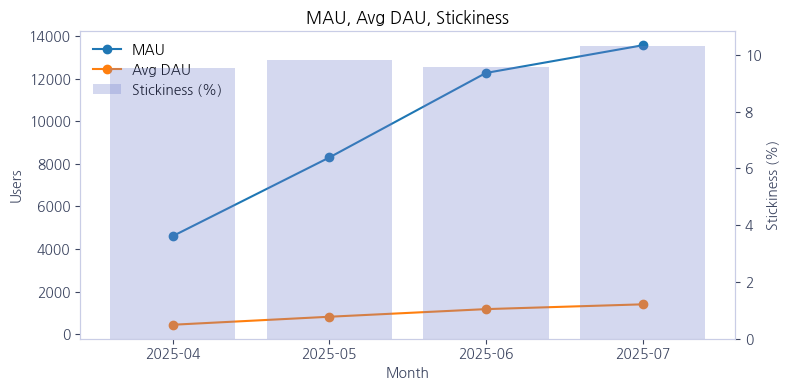

     Month    MAU      Avg_DAU  Stickiness_%
0  2025-04   4605   439.866667      9.551936
1  2025-05   8300   816.000000      9.831325
2  2025-06  12272  1174.300000      9.568937
3  2025-07  13571  1399.227273     10.310421


In [201]:
# (B) 월간 MAU / Avg DAU + Stickiness(%)
fig3, ax3 = plt.subplots(figsize=(8, 4))
x = metrics["Month"].astype(str)

# 선그래프
ax3.plot(x, metrics["MAU"], marker="o", label="MAU")
ax3.plot(x, metrics["Avg_DAU"], marker="o", label="Avg DAU")

ax3.set_xlabel("Month")
ax3.set_ylabel("Users")
ax3.set_title("MAU, Avg DAU, Stickiness")

GATI_MAIN = "#7180CB"
ax4 = ax3.twinx()
ax4.bar(x, metrics["Stickiness_%"], alpha=0.3, label="Stickiness (%)", color=GATI_MAIN)

ax4.set_ylabel("Stickiness (%)")

lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc="upper left")

fig3.tight_layout()
plt.show()

print(metrics)

In [205]:
# 마지막주 제외한 버전
df = log.copy()

# 1) 핵심행동 필터링
df_core = df[df["event_name"] == "lesson_played"].copy()
df_core["event_timestamp"] = pd.to_datetime(df_core["event_timestamp"])

# 2) 날짜 파생
df_core["date"]  = df_core["event_timestamp"].dt.date
df_core["week"]  = df_core["event_timestamp"].dt.to_period("W")

# 3) 마지막 주 제외
last_week = df_core["week"].max()
df_core_no_lastweek = df_core[df_core["week"] != last_week]

# 4) 지표 계산
dau = df_core_no_lastweek.groupby("date")["user_id"].nunique().rename("DAU")
wau = df_core_no_lastweek.groupby("week")["user_id"].nunique().rename("WAU")

print(dau.head())
print(wau.head())

date
2025-04-01    286
2025-04-02    216
2025-04-03    363
2025-04-04    286
2025-04-05    299
Name: DAU, dtype: int64
week
2025-03-31/2025-04-06    1409
2025-04-07/2025-04-13    1927
2025-04-14/2025-04-20    2313
2025-04-21/2025-04-27    2749
2025-04-28/2025-05-04    3129
Freq: W-SUN, Name: WAU, dtype: int64


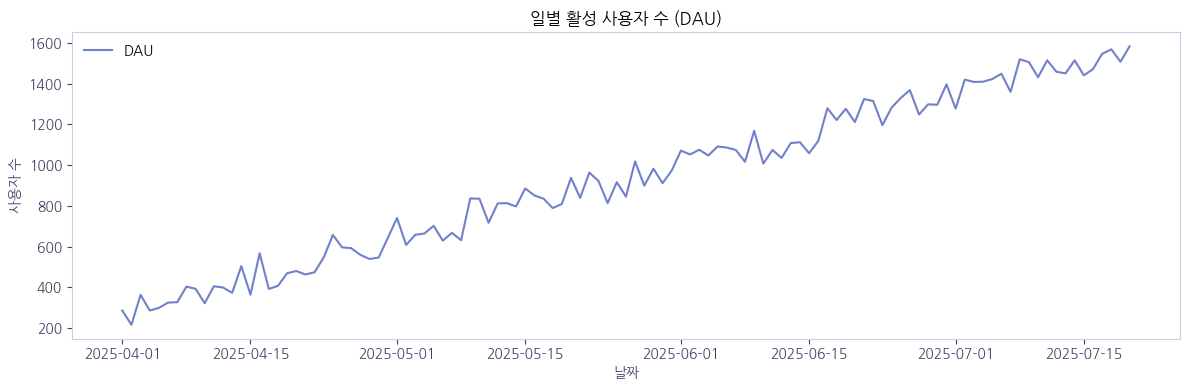

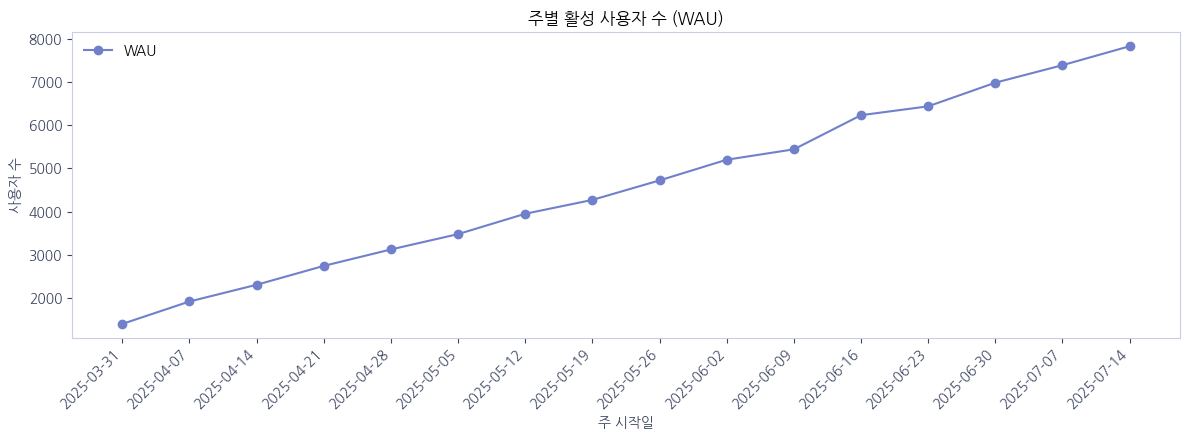

In [206]:
PRIMARY = "#7180CB"

# 전역 설정 - 배경 흰색
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

# (A) DAU
fig1, ax1 = plt.subplots(figsize=(12, 4))
ax1.plot(pd.to_datetime(dau.index), dau.values, label="DAU", color=PRIMARY)
ax1.set_title("일별 활성 사용자 수 (DAU)")
ax1.set_xlabel("날짜")
ax1.set_ylabel("사용자 수")
ax1.legend()
fig1.tight_layout()
plt.show()

# (B) WAU
fig2, ax2 = plt.subplots(figsize=(12, 4.5))
xlabels = wau.index.astype(str).str.split('/').str[0]
ax2.plot(xlabels, wau.values, marker="o", label="WAU", color=PRIMARY)

ax2.set_title("주별 활성 사용자 수 (WAU)")
ax2.set_xlabel("주 시작일")
ax2.set_ylabel("사용자 수")
ax2.legend()

ax2.set_xticks(range(len(wau.index)))
ax2.set_xticklabels(xlabels, rotation=45, ha='right')

fig2.tight_layout()
plt.show();

Text(0.5, 1.0, '일별 & 주별 활성 사용자 수 (DAU vs WAU)')

Text(0.5, 0, '날짜')

Text(0, 0.5, '사용자 수')

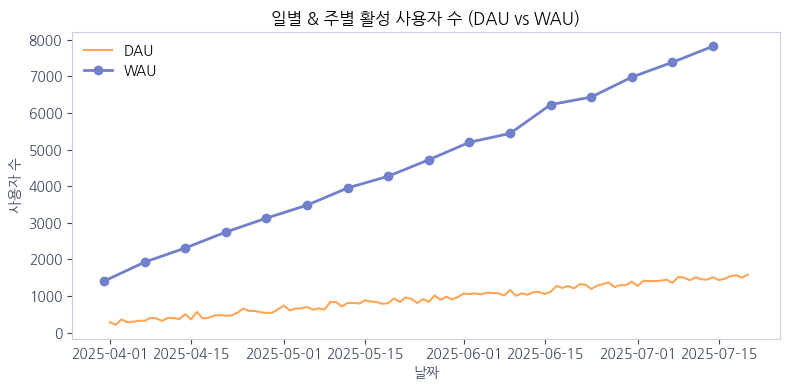

In [185]:
# DAU, WAU 하나의 그래프로
PRIMARY = "#FF7F0E"
SECONDARY = "#7180CB"

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

fig, ax = plt.subplots(figsize=(8, 4))

# DAU
ax.plot(pd.to_datetime(dau.index), dau.values, label="DAU", color=PRIMARY, alpha=0.7)

# WAU → 주 시작일을 날짜로 변환
wau_dates = pd.to_datetime(wau.index.to_timestamp())  # PeriodIndex → Timestamp 변환
ax.plot(wau_dates, wau.values, marker="o", label="WAU", color=SECONDARY, linewidth=2)

# 축/레이블
ax.set_title("일별 & 주별 활성 사용자 수 (DAU vs WAU)")
ax.set_xlabel("날짜")
ax.set_ylabel("사용자 수")
ax.legend()
fig.tight_layout()
plt.show()

## 2) 주차별 수익추이

In [202]:
# 2) 주차별 집계
weekly_rev = (
    payment.set_index('event_time')
           .resample('W-MON')['amount'].sum()
           .reset_index()
           .rename(columns={'event_time':'week_start', 'amount':'revenue'})
)

In [ ]:
import matplotlib.dates as mdates

Text(0.5, 1.0, '주차별 결제 수익 추이')

Text(0.5, 0, '주 시작일(월요일)')

Text(0, 0.5, '수익 (단위: 달러)')

(array([20185., 20192., 20199., 20206., 20213., 20220., 20227., 20234.,
        20241., 20248., 20255., 20262., 20269., 20276., 20283., 20290.]),
 [Text(20185.0, 0, '2025-04-07'),
  Text(20192.0, 0, '2025-04-14'),
  Text(20199.0, 0, '2025-04-21'),
  Text(20206.0, 0, '2025-04-28'),
  Text(20213.0, 0, '2025-05-05'),
  Text(20220.0, 0, '2025-05-12'),
  Text(20227.0, 0, '2025-05-19'),
  Text(20234.0, 0, '2025-05-26'),
  Text(20241.0, 0, '2025-06-02'),
  Text(20248.0, 0, '2025-06-09'),
  Text(20255.0, 0, '2025-06-16'),
  Text(20262.0, 0, '2025-06-23'),
  Text(20269.0, 0, '2025-06-30'),
  Text(20276.0, 0, '2025-07-07'),
  Text(20283.0, 0, '2025-07-14'),
  Text(20290.0, 0, '2025-07-21')])

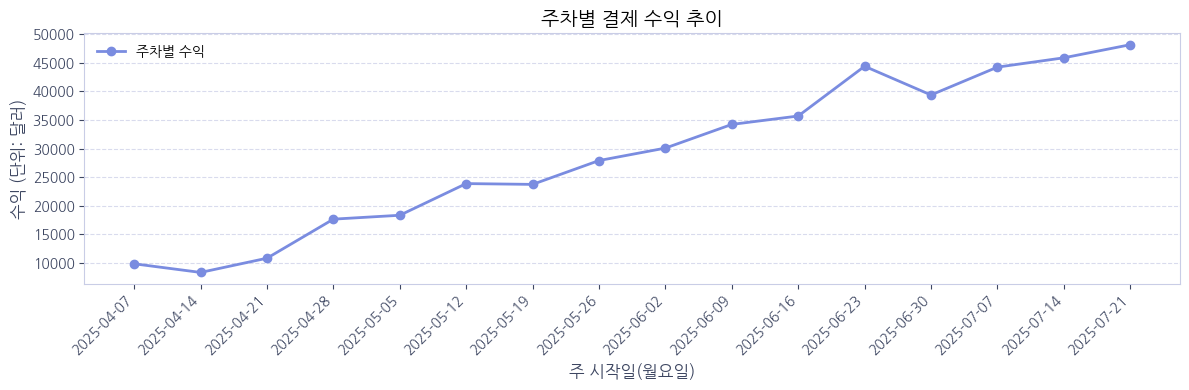

In [203]:
# 3) 시각화
PRIMARY = "#7A8CE0"
MOVING_AVG_COLOR = "#FF8C00"

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(weekly_rev['week_start'], weekly_rev['revenue'], marker='o', linewidth=2,
        color=PRIMARY, label='주차별 수익')

ax.set_title("주차별 결제 수익 추이", fontsize=14)
ax.set_xlabel("주 시작일(월요일)", fontsize=12)
ax.set_ylabel("수익 (단위: 달러)", fontsize=12)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()
plt.tight_layout()
plt.show()

## 3) 가입된 사람 중 구독여부 파이차트

In [191]:
# 1) users 테이블에 결제 여부 컬럼 추가
users['is_paid'] = users['user_id'].isin(payment['user_id']).astype(int)

# 2) 구독 여부별 인원 수 집계
paid_count = (users['is_paid'] == 1).sum()
unpaid_count = (users['is_paid'] == 0).sum()

# 3) 데이터 준비
labels = ['결제 완료', '결제 안 함']
sizes = [paid_count, unpaid_count]
colors = ['#7A8CE0', '#D3D3D3']  # 메인컬러, 회색


Text(0.5, 1.0, '<전체 가입자 대비 결제 완료 비율>')

(np.float64(-1.099999824375813),
 np.float64(1.0999963181014096),
 np.float64(-1.0999961336784534),
 np.float64(1.0999998158894502))

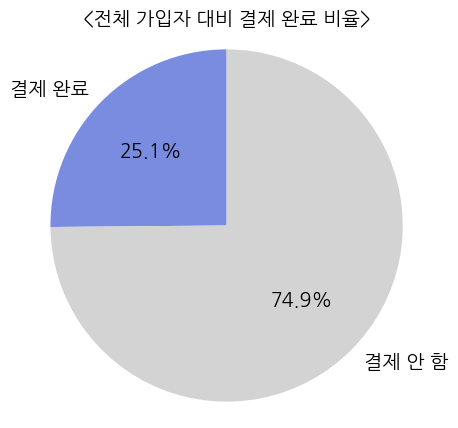

In [192]:
# 4) 파이차트
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=90, textprops={'color': 'black', 'fontsize': 14}
)

# 5) 제목
ax.set_title("<전체 가입자 대비 결제 완료 비율>", fontsize=14 )
ax.axis('equal')  # 원형 유지

plt.show()

In [199]:
###
bins = list(range(10, 131, 10))  # 10, 20, ..., 120
labels = [f"{i}대" for i in range(10, 121, 10)]
users["age_group"] = pd.cut(users["age"], bins=bins, right=False, labels=labels)
users.groupby("age_group").size().reset_index(name="user_count")

/tmp/ipython-input-2721039599.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,age_group,user_count
0,10대,3736
1,20대,3891
2,30대,3676
3,40대,3804
4,50대,3713
5,60대,616
6,70대,618
7,80대,596
8,90대,613
9,100대,632
